# Customization: Custom Loss Function

A **loss function** is used to evaluate the model performance on learning from the training data. and it varies depending on the nature of what to learn.  

There are multiple loss functions already defined in Tensorflow for immediate use, and this module will show how you can define your own loss function.  

Loss functions are added to the model during compilation, they can be specified in 3 ways:

1. As a string, which is the name of the loss function e.g. 'sparse_softmax_cross_entropy_with_logits'
2. As a built-in function in tensorflow living under `tf.keras.loss`, e.g. sparse_softmax_cross_entropy_with_logits.
3. Custom function that you define which follows the signature of the built-in function.

```python
def my_loss(y_true, y_pred):
    # y_true is the true labels, y_pred is the predicted labels
    return tf.reduce_mean(tf.square(y_pred - y_true))
```


In [1]:
# lets kick start with some imports
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.keras as K

## Huber Loss

For our first custom loss function, we will use the [Huber loss](https://en.wikipedia.org/wiki/Huber_loss) which is a popular loss function for regression.  


In [2]:
def Huber_loss(threshold) -> tf.keras.losses.Loss:

  @tf.function
  def huber_loss(y_true, y_pred):
    """Calculates the huber loss.
    Parameters
    ----------
    y_true : tensor of true targets.
    y_pred : tensor of predicted targets.

    Returns
    -------
    loss : tensor, shape (batch_size, 1)
    """
    err = y_true - y_pred

    cond = tf.abs(err) < threshold
    L2 = 0.5 * tf.square(err)
    L1 = tf.abs(err) - 0.5
    loss = tf.where(cond, L2, L1)   # Keras does not cover where function in tensorflow :-(

    return loss
  
  return huber_loss

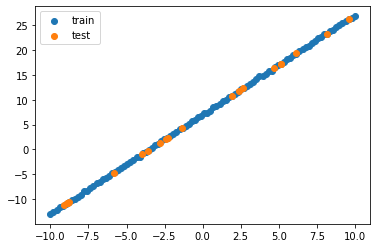

In [3]:
# lets create some basic setup to test the huber loss
# we will use a simple linear regression model
# with a huber loss
x = np.linspace(-10, 10, 100)
y = 2 * x + 7 + np.random.normal(0, 0.1, 100)

test_x = np.random.uniform(-10, 10, 20).reshape(-1, 1)
test_y = 2 * test_x + 7

# plot the data
plt.scatter(x, y)
plt.scatter(test_x, test_y)
plt.legend(['train', 'test'])

In [4]:
from simple_model import train_model

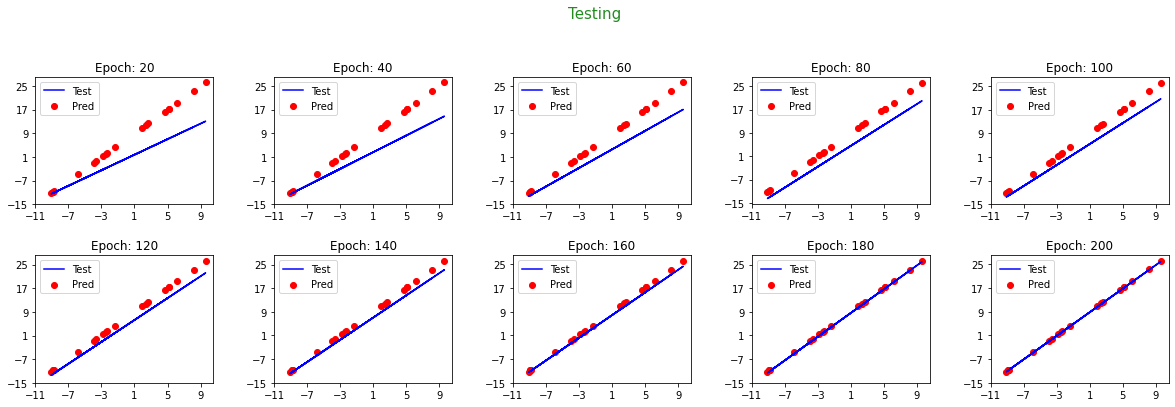

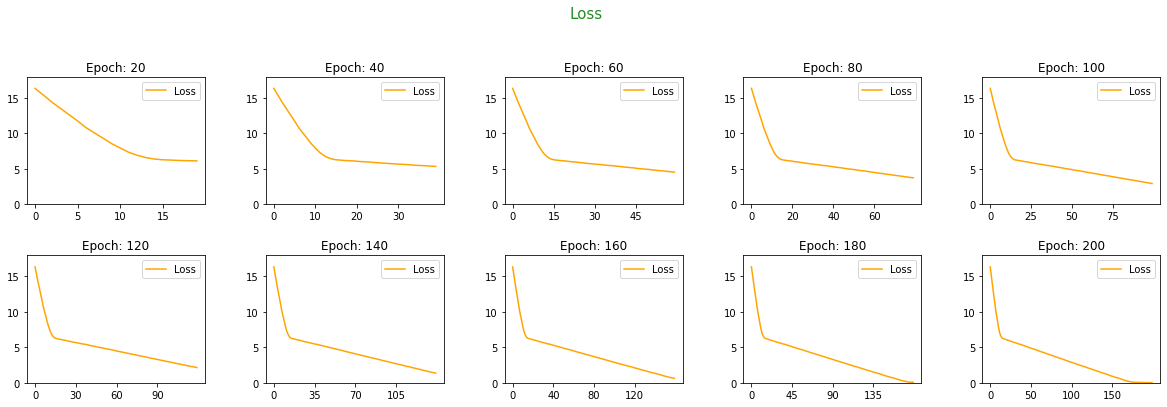

In [5]:
train_model(Huber_loss(0.5), x, y, test_x, test_y, epochs_step=20, steps = 10)

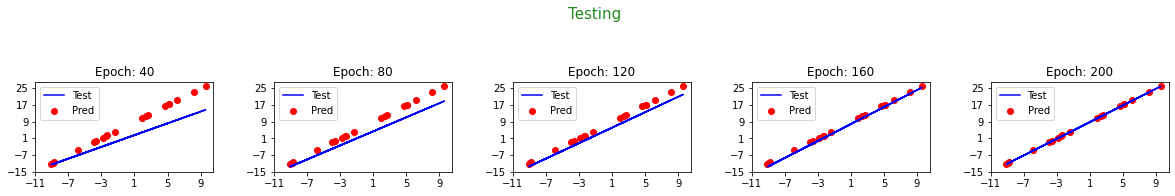

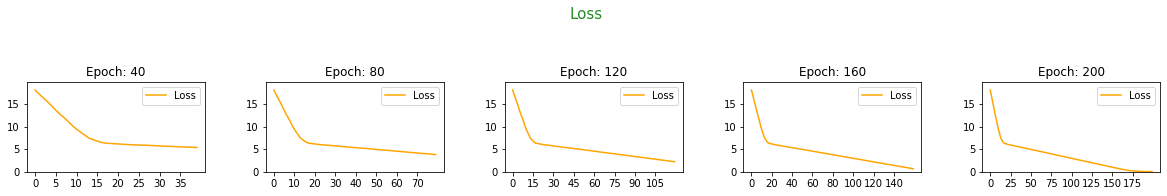

In [6]:
train_model(Huber_loss(1), x, y, test_x, test_y, epochs_step=40)

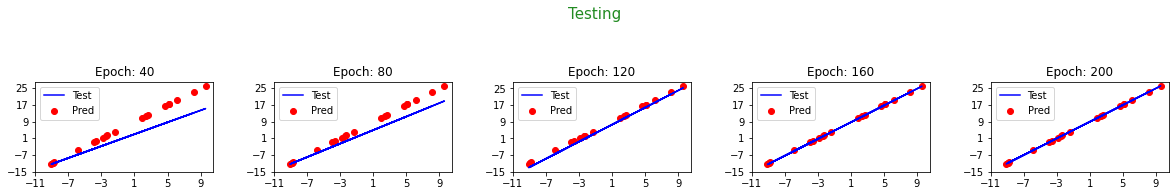

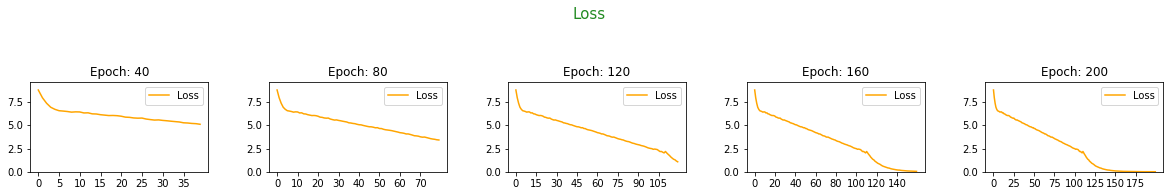

In [7]:
train_model(Huber_loss(3), x, y, test_x, test_y, epochs_step=40)

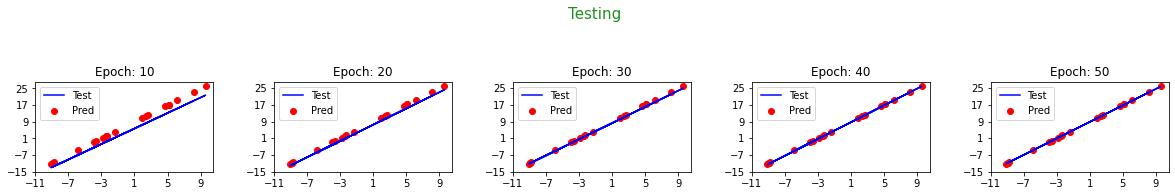

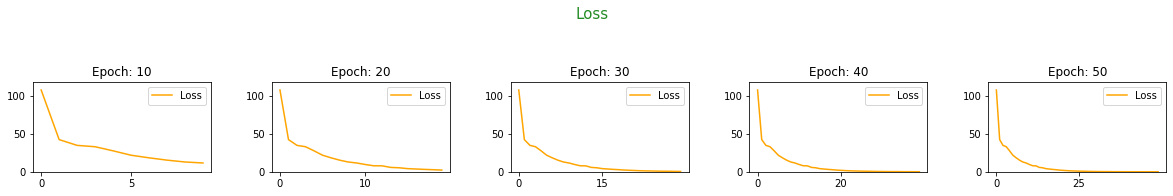

In [8]:
train_model(tf.keras.losses.mean_squared_error, x, y, test_x, test_y, epochs_step=10)

# Custom class loss 

Loss functions can also be implemented as classes, they need to implement the parent class `tf.keras.losses.Loss` and have a `call` method.

They mainly have two methods:
1. `call`: This method is called to evaluate the loss function on the given inputs.
2. `__init__`: This method is called to initialize the loss function.

```python
class MyLoss(tf.keras.losses.Loss):
    def __init__(self, ...):
        super(MyLoss, self).__init__(name='my_loss')
        ...

    def call(self, y_true, y_pred):
        # y_true is the true labels, y_pred is the predicted labels
        # this function is the actual loss function called by the model.
        ...
```

In [9]:
class MyHuberLoss(tf.keras.losses.Loss):
  
    # initialize instance attributes
    def __init__(self, threshold=1):
        super().__init__()
        self.threshold = threshold

    # compute loss
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) <= self.threshold
        small_error_loss = tf.square(error) / 2
        big_error_loss = self.threshold * (tf.abs(error) - (0.5 * self.threshold))
        return tf.where(is_small_error, small_error_loss, big_error_loss)

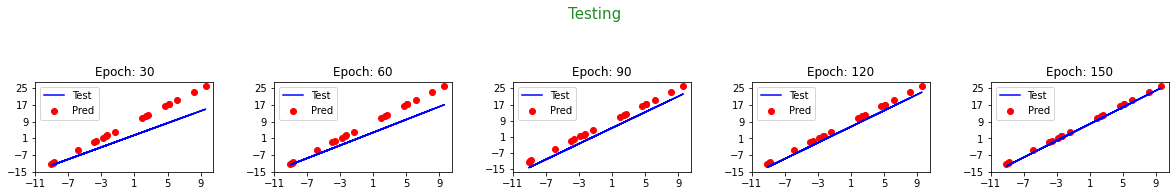

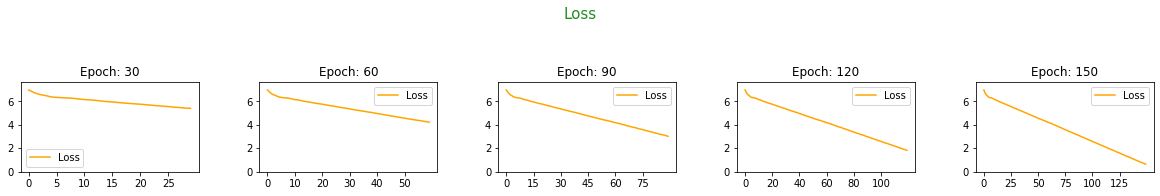

In [10]:
train_model(MyHuberLoss(1.0), x, y, test_x, test_y, epochs_step=30)

# Notes

This notebook covered how to create a custom loss function, and how to use it in a model, the topic of loss functions itself is covered in the [Tensorflow loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses/Loss) section in tensorflow API docs, we will also cover some of them in neural networks basics and when to use which.
